In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Datos MOONS

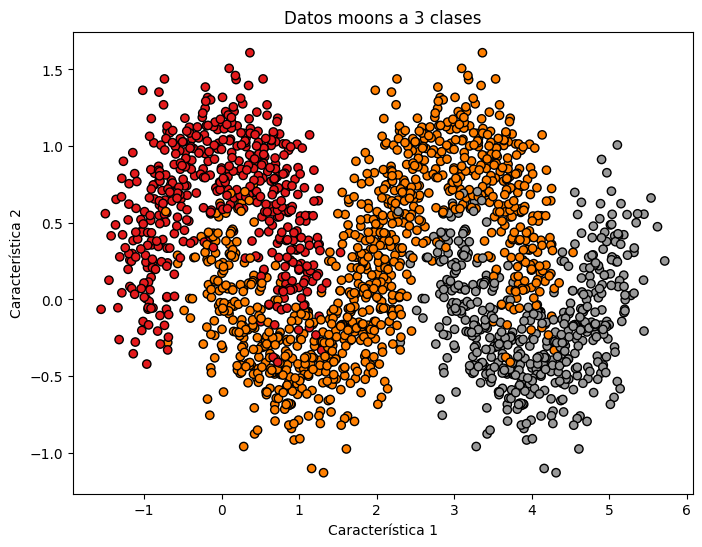

In [2]:
# Datos sintéticos de make_moons (2 clases)
X1, y1 = make_moons(n_samples=1000, noise=0.25, random_state=42)
X2, y2 = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Crear tercera clase recorriendo coordenadas para la mitad de los datos y creando nueva etiqueta
X2[:, 0] += 3  # aplicar un desplazamiento en eje x
y2 = y2 + 1    # asignar nueva etiqueta

# Combinar los datos
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Representación one-hot
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = one_hot_encoder.fit_transform(y.reshape(-1, 1))


# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Datos moons a 3 clases')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir conjuntos de prueba y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)


## Funciones de activacion y perdida

In [3]:
#Funcion de perdida
def loss_function(y_hat,y):
    return np.mean((y_hat-y)**2)

#Derivada de la funcion de perdida
def d_loss_function(y_hat,y):
    n = y_hat.shape[0]
    return (2/n)*np.sum(y_hat-y)

#Funcion de activacion 1
def relu(z):
    return np.maximum(z,0)
    
#Derivada de la funcion de activacion 1
def d_relu(z):
    return np.where(z>0,1,0)
    
#Funcion de la funcion activacion 2
def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sigmoid(a):
    return a*(1-a)

#Derivada de tanh

def d_tanh(a):
    return a*(1-a**2)



## Derivadas parciales con respecto a la funcion de perdida

Derivadas considerando la funcion sigmoide

In [4]:
#Derivada de la perdida respecto a W3
def DL_W3(y_hat,y,a2):
    return a2.T@(y_hat-y)
#Derivada de la perdida respecto a W2
def DL_W2(y_hat,y,W3,a2,a1):
    return a1.T@((y_hat-y)@W3.T*(d_sigmoid(a2)))
#Derivada de la perdida respecto a b2
def DL_b2(y_hat,y,W3,a2):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2)))
#Derivada de la perdida respecto a W1
def DL_W1(y_hat,y,W3,W2,a2,z1,X):
    return X.T@((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))
#Derivada de la perdida respecto a b1
def DL_b1(y_hat,y,W3,W2,a2,z1):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))

Derivadas considerando la funcion $tanh(z)$

In [5]:
#Derivada de la perdida respecto a W3
def DL_W3_2(y_hat,y,a2):
    return a2.T@(y_hat-y)
#Derivada de la perdida respecto a W2
def DL_W2_2(y_hat,y,W3,a2,a1):
    return a1.T@((y_hat-y)@W3.T*(d_tanh(a2)))
#Derivada de la perdida respecto a b2
def DL_b2_2(y_hat,y,W3,a2):
    return np.sum((y_hat-y)@W3.T*(d_tanh(a2)))
#Derivada de la perdida respecto a W1
def DL_W1_2(y_hat,y,W3,W2,a2,z1,X):
    return X.T@((y_hat-y)@W3.T*(d_tanh(a2))@W2.T*d_relu(z1))
#Derivada de la perdida respecto a b1
def DL_b1_2(y_hat,y,W3,W2,a2,z1):
    return np.sum((y_hat-y)@W3.T*(d_tanh(a2))@W2.T*d_relu(z1))

### Propagacion hacia delante 

In [6]:

#Propagacion hacia delante es 
#con la funcion sigmoide para la segunda capa oculta
def feed_forward_1(X,W1,W2,W3,b1,b2):
    #Primer capa oculta
    z_1 = X@W1+b1
    a_1 = relu(z_1)
    #SEgunda capa oculta
    z_2 = a_1@W2+b2
    a_2 = sigmoid(z_2)
    #Capa de salida
    y_hat = a_2@W3

    return z_1,a_1,z_2,a_2,y_hat    


#Propagacion hacia delante es con 
#la funcion tanh para la segunda capa oculta

def feed_forward_2(X,W1,W2,W3,b1,b2):
    #Primer capa oculta
    z_1 = X@W1+b1
    a_1 = relu(z_1)
    #SEgunda capa oculta
    z_2 = a_1@W2+b2
    a_2 = np.tanh(z_2)
    #Capa de salida
    y_hat = a_2@W3

    return z_1,a_1,z_2,a_2,y_hat    

### Propagacion hacia atras

In [7]:
def backpropagation_1(X,Y,W1,W2,W3,b1,b2):
    z1,a1,z2,a2,yhat = feed_forward_1(X,W1,W2,W3,b1,b2)
    
    dW3 = DL_W3(yhat,Y,a2)
    dW2 = DL_W2(yhat,Y,W3,a2,a1)
    db2 = DL_b2(yhat,Y,W3,a2)
    dW1 = DL_W1(yhat,Y,W3,W2,a2,z1,X)
    db1 = DL_b1(yhat,Y,W3,W2,a2,z1)

    return dW1,dW2,dW3,db1,db2,yhat

def backpropagation_2(X,Y,W1,W2,W3,b1,b2):
    z1,a1,z2,a2,yhat = feed_forward_2(X,W1,W2,W3,b1,b2)
    
    dW3 = DL_W3_2(yhat,Y,a2)
    dW2 = DL_W2_2(yhat,Y,W3,a2,a1)
    db2 = DL_b2_2(yhat,Y,W3,a2)
    dW1 = DL_W1_2(yhat,Y,W3,W2,a2,z1,X)
    db1 = DL_b1_2(yhat,Y,W3,W2,a2,z1)

    return dW1,dW2,dW3,db1,db2,yhat

### Actualizacion de pesos

In [8]:
def update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr):
    
    W1 -= lr*dW1
    b1 -= lr*db1

    W2 -= lr*dW2
    b2 -= lr*db2

    W3 -= lr*dW3  

    # print("PESOS ACTUALES")
    # print(W1)
    # print("")
    # print(W2)
    # print("")
    # print(W3)

    return W1,W2,W3,b1,b2

### Entrenamiento   

Implementacion del algoritmo de retropropagacion, para hacer una comparativa entre las 2 funciones de activacion, asi como medir el accuracy del modelo

### Retropropagacion sigmoide

In [9]:
n = 20 #Numero de iteraciones para obtener el Accuracy promedio

Iteracion 0
Epoca 0, perdida 14.542546042653603
Epoca 1000, perdida 0.06697667950725619
Epoca 2000, perdida 0.06471680376258201
Epoca 3000, perdida 0.06371404670959223
Epoca 4000, perdida 0.06301251096621233
Epoca 5000, perdida 0.06227424729270464
Epoca 6000, perdida 0.06144003979013872
Epoca 7000, perdida 0.06099940594497139
Epoca 8000, perdida 0.0607614218104585
Epoca 9000, perdida 0.06055808121194463
Accuracy del modelo 86.5%
Iteracion 1
Epoca 0, perdida 10.955634111863763
Epoca 1000, perdida 0.06976746531006253
Epoca 2000, perdida 0.06327055835870353
Epoca 3000, perdida 0.06211426327041737
Epoca 4000, perdida 0.0615023364711448
Epoca 5000, perdida 0.06092355206427468
Epoca 6000, perdida 0.06015010508160404
Epoca 7000, perdida 0.059503958395247004
Epoca 8000, perdida 0.05892461126156298
Epoca 9000, perdida 0.05837815478508437
Accuracy del modelo 86.67%
Iteracion 2
Epoca 0, perdida 9.421162013724723
Epoca 1000, perdida 0.07524958814899155
Epoca 2000, perdida 0.06647029011301589
Epoca

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy del modelo 87.17%


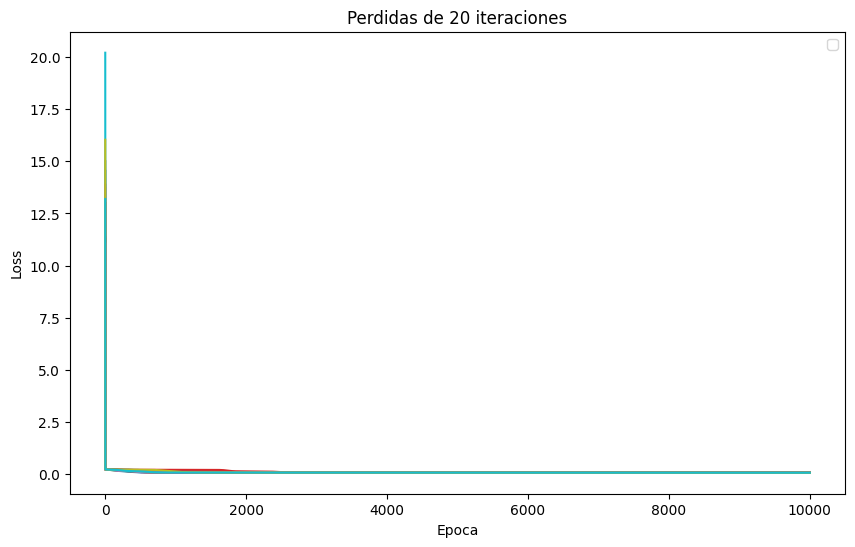

In [10]:
accuracyes_1 = np.array([]) #Lista de acuraccye de cada iteracion
total_loss = [] #Lista de perdidas de cada iteracion
pesos_sesgos_1 = [] #Guardamos los pesos y bias en una lista, 
                    #para poder usar despues el que mejosr accuracy tuvo
for a in range(n):
    print(f"Iteracion {a}")
    #Iniciamos pesos y sesgos aleatorios para la primer capa oculta
    W1 = np.random.random(size=(2,8)) 
    b1 = np.random.random(size=(1,8)) 
    #Pesos y sesgo segunda capa oculta
    W2= np.random.random(size=(8,8)) 
    b2 = np.random.random(size=(1,8)) 
    #Pesos de la ultima capa
    W3 = np.random.random(size=(8,3)) 

    #Tasa de aprendizaje
    lr=0.0001

    #Lista para guardar las perdidaas
    losses = np.array([])

    for i in range(10000):
        #Propagacion hacia delante con pesos aletorios
        dW1,dW2,dW3,db1,db2,yhat = backpropagation_1(X_train,y_train,W1,W2,W3,b1,b2)
        #Calculo de la perdida
        loss = loss_function(yhat,y_train)
        losses=np.append(losses,loss)
        if i%1000 == 0:
            print(f"Epoca {i}, perdida {loss}")
        #Calculo de las derivadas y ajuste a pesos y sesgos
        W1,W2,W3,b1,b2 = update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr)
    #print(losses_1)
    total_loss.append(losses)
    #print(total_loss)
    #plot_loss(losses_1)


    #Prueba del modelo en el conjunto test
    #Guardamos los pesos y bias de la iteracion
    pesos_act = [W1,W2,W3,b1,b2]
    pesos_sesgos_1.append(pesos_act)

    #Se realiza el feed forward en el vonunto test, 
    # con los pesos optimizados
    _,_,_,_,y_hat=feed_forward_1(X_test,W1,W2,W3,b1,b2)

    #predicciones
    pred = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores de maximo valor de cada lista 
    #etiquetas verdaderas
    true =  np.argmax(y_test,axis=1)

    #Calculo del accuracy del modelo 
    accuracy = (np.sum(pred==true)/len(true))*100
    accuracyes_1 = np.append(accuracyes_1,accuracy)
    
    print(f"Accuracy del modelo {round(accuracy,2)}%")

total_loss =np.array(total_loss)

plt.figure(figsize=(10,6))
for i,perdida in enumerate(total_loss):
    plt.plot(perdida)
plt.legend()
plt.title(f"Perdidas de {n} iteraciones")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

Promedio de accuracy para el modelo con sigmoide

In [11]:
print(f"Mean accuracy {np.round(np.mean(accuracyes_1),2)}%")

Mean accuracy 86.22%


### Retropropagacion tanh

Iteracion 0
Epoca 0, perdida 15.696188015416233
Epoca 1000, perdida 0.19825045240064995
Epoca 2000, perdida 0.19798460624785652
Epoca 3000, perdida 0.1979307238701448
Epoca 4000, perdida 0.19784523281631186
Epoca 5000, perdida 0.19760979265636622
Epoca 6000, perdida 0.14096427630382485
Epoca 7000, perdida 0.06679626657074592
Epoca 8000, perdida 0.061013979532545885
Epoca 9000, perdida 0.05928474726205083
Accuracy del modelo 86.17%
Iteracion 1
Epoca 0, perdida 7.551510168806695
Epoca 1000, perdida 0.07794525235586577
Epoca 2000, perdida 0.07038993341446395
Epoca 3000, perdida 0.06722954785310482
Epoca 4000, perdida 0.06552207911589646
Epoca 5000, perdida 0.06440891650779863
Epoca 6000, perdida 0.06239076737378134
Epoca 7000, perdida 0.060857298884566514
Epoca 8000, perdida 0.06928370297054842
Epoca 9000, perdida 0.144759847646106
Accuracy del modelo 65.0%
Iteracion 2
Epoca 0, perdida 12.029709432315974
Epoca 1000, perdida 0.0823206310129926
Epoca 2000, perdida 0.07309366822505393
Epoca 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy del modelo 81.17%


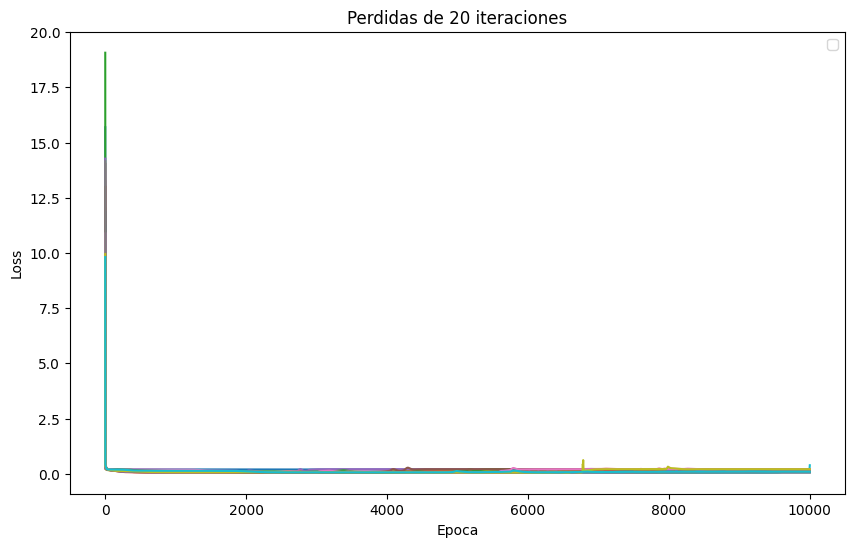

In [12]:
#Note que la prpagacion hacia atras se hace con el modelo 2
accuracyes_2 = np.array([])
total_loss_2 = []
pesos_sesgos_2 = []
for a in range(n):
    print(f"Iteracion {a}")
    #Iniciamos pesos y sesgos aleatorios para la primer capa oculta
    W1 = np.random.random(size=(2,8)) 
    b1 = np.random.random(size=(1,8)) 
    #Pesos y sesgo segunda capa oculta
    W2= np.random.random(size=(8,8)) 
    b2 = np.random.random(size=(1,8)) 
    #Pesos de la ultima capa
    W3 = np.random.random(size=(8,3)) 

    #Tasa de aprendizaje
    lr=0.0001

    #Lista para guardar las perdidaas
    losses = np.array([])

    for i in range(10000):
        #Propagacion hacia delante con pesos aletorios
        dW1,dW2,dW3,db1,db2,yhat = backpropagation_2(X_train,y_train,W1,W2,W3,b1,b2)
        #Calculo de la perdida
        loss = loss_function(yhat,y_train)
        losses=np.append(losses,loss)
        if i%1000 == 0:
            print(f"Epoca {i}, perdida {loss}")
        #Calculo de las derivadas y ajuste a pesos y sesgos
        W1,W2,W3,b1,b2 = update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr)
    #print(losses_1)
    total_loss_2.append(losses)
    #print(total_loss)
    #plot_loss(losses_1)


    #Prueba del modelo en el conjunto test

    #Guardamos los pesos y bias de la iteracion
    pesos_act = [W1,W2,W3,b1,b2]
    
    pesos_sesgos_2.append(pesos_act)

    #Se realiza el feed forward en el vonunto test, 
    # con los pesos optimizados
    _,_,_,_,y_hat=feed_forward_2(X_test,W1,W2,W3,b1,b2)

    #predicciones
    pred = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores de maximo valor de cada lista 
    #etiquetas verdaderas
    true =  np.argmax(y_test,axis=1)

    #Calculo del accuracy del modelo 
    accuracy = (np.sum(pred==true)/len(true))*100
    accuracyes_2 = np.append(accuracyes_2,accuracy)
    
    print(f"Accuracy del modelo {round(accuracy,2)}%")

total_loss_2 =np.array(total_loss_2)

plt.figure(figsize=(10,6))
for i,perdida in enumerate(total_loss_2):
    plt.plot(perdida)
plt.legend()
plt.title(f"Perdidas de {n} iteraciones")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

In [13]:
print(f"Mean accuracy {np.round(np.mean(accuracyes_2),2)}%")

Mean accuracy 60.05%


Mejores parametros de la red para las diferentes arquitecturas, basandonos en el accuracy

In [14]:
#Modelo con sigmoide en la segunda capaa de activacion

#Se obtiene el indice de la iteracion con el mejor accuracy
index = np.where(np.round(accuracyes_1,2) == np.max(np.round(accuracyes_1,2)))[0][0]
#Obtenemos los pesos y bias asociados de el mejor accuracy
best_parameters_1 = pesos_sesgos_1[index]

#Modelo con tanh en la segunda capaa de activacion

index = np.where(np.round(accuracyes_2,2) == np.max(np.round(accuracyes_2,2)))[0][0]

best_parameters_2 = pesos_sesgos_2[index]

In [15]:
#Mejores parametros modelo 1
W1_b = best_parameters_1[0]
W2_b = best_parameters_1[1]
W3_b = best_parameters_1[2]
b1_b = best_parameters_1[3]
b2_b = best_parameters_1[4]

_,_,_,_,y_hat=feed_forward_1(X_test,W1_b,W2_b,W3_b,b1_b,b2_b)

#predicciones
pred_1 = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores

#Mejores parametros modelo 2
W1_b2 = best_parameters_2[0]
W2_b2 = best_parameters_2[1]
W3_b2 = best_parameters_2[2]
b1_b2 = best_parameters_2[3]
b2_b2 = best_parameters_2[4]

_,_,_,_,y_hat=feed_forward_2(X_test,W1_b2,W2_b2,W3_b2,b1_b2,b2_b2)

#predicciones
pred_2 = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores


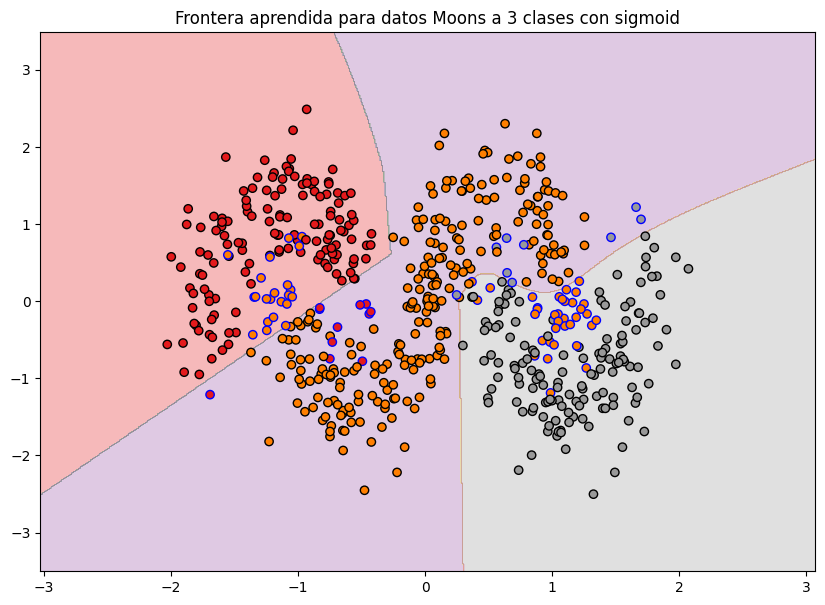

In [16]:
plt.figure(figsize=(10,7))
true =  np.argmax(y_test,axis=1)
#Valores para el plano (Eje x y Eje y)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
#En esta parte se aplanan los puntos de xx y yy y despues se unen cpn c_ (se crea el plano de puntos)
grid = np.c_[xx.ravel(), yy.ravel()]
_,_,_,_,Z =feed_forward_1(grid,W1_b,W2_b,W3_b,b1_b,b2_b)
Z=np.argmax(Z,axis=1).reshape(xx.shape)
#Se grafican los contornos
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
#Se asignan colores dependiendo de la clase y si estubo bien clasificada
colors = []
edge_cols = []
for i in range(0,true.shape[0]):
    colors.append( true[i] )
    if pred_1[i] == true[i] :
        #SI estuvo bien clasificada el contorno es negro
        
        edge_cols.append( 'black' )
    else:
        #Mal clasificada es azul
        edge_cols.append( 'blue' )
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors,edgecolors=edge_cols ,cmap=plt.cm.Set1)
plt.title('Frontera aprendida para datos Moons a 3 clases con sigmoid')
plt.show()

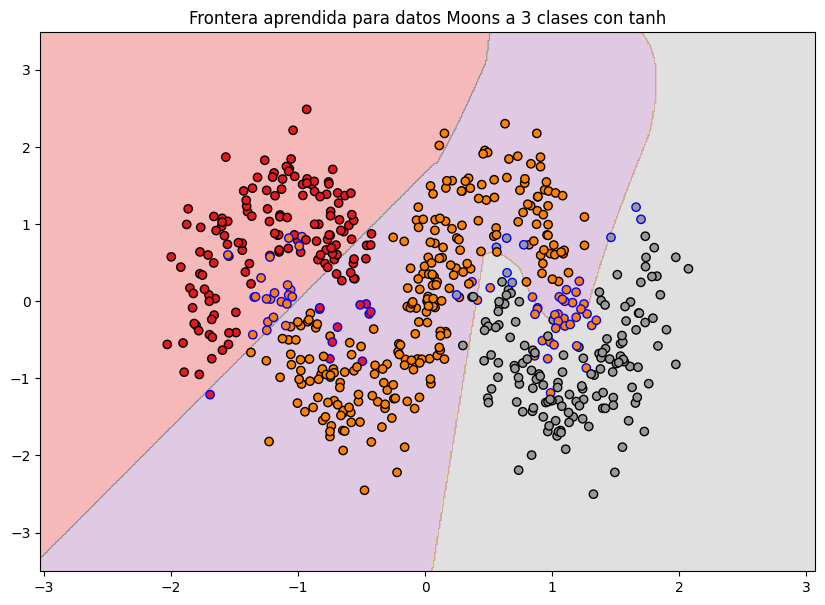

In [17]:
plt.figure(figsize=(10,7))
true =  np.argmax(y_test,axis=1)
#Valores para el plano (Eje x y Eje y)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
#En esta parte se aplanan los puntos de xx y yy y despues se unen cpn c_
grid = np.c_[xx.ravel(), yy.ravel()]
_,_,_,_,Z =feed_forward_2(grid,W1_b2,W2_b2,W3_b2,b1_b2,b2_b2)
Z=np.argmax(Z,axis=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
colors = []
edge_cols = []
for i in range(0,true.shape[0]):
    colors.append( true[i] )
    if pred_1[i] == true[i] :
        edge_cols.append( 'black' )
    else:
        edge_cols.append( 'blue' )
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors,edgecolors=edge_cols ,cmap=plt.cm.Set1)
plt.title('Frontera aprendida para datos Moons a 3 clases con tanh')
plt.show()